In [101]:
import numpy as np
import matplotlib.pyplot as plt

def generate_GOE_matrix(N):
    """
    Generate a Gaussian Orthogonal Ensemble (GOE) matrix of size N x N.
    """
    A = np.random.normal(0, 1, (N, N))
    return (A + A.T) / 2

def generate_GUE_matrix(N):
    """
    Generate a Gaussian Unitary Ensemble (GUE) matrix of size N x N.
    """
    # Real part
    real = np.random.normal(0, 1, (N, N))
    # Imaginary part
    imag = np.random.normal(0, 1, (N, N))
    # Making the matrix Hermitian
    A = real + 1j*imag
    A = (A + A.conj().T) / 2
    return A

def diagonalize(matrix):
    """
    Diagonalize a matrix and return its eigenvalues.
    """
    eigenvalues, _ = np.linalg.eigh(matrix)
    return eigenvalues

def plot_spectral_density(eigenvalues, bins=50, scale=1):
    """
    Plot the empirical spectral density of the eigenvalues.
    """
    plt.hist(eigenvalues*scale, bins=bins, density=True)
    plt.xlabel('Eigenvalue')
    plt.ylabel('Density')
    plt.title('Empirical Spectral Density')
    plt.show()

def wigner_semicircle_law(x):
    """
    Wigner's semi-circle distribution.
    """
    return 1/(2*np.pi) * np.sqrt(4 - x**2) if abs(x) <= 2 else 0

def plot_wigner_comparison(eigenvalues, bins=50, scale=1):
    """
    Plot the histogram of eigenvalues and overlay the Wigner semi-circle law for comparison.
    """
    plt.hist(eigenvalues*scale, bins=bins, density=True, alpha=0.5, label='Empirical')
    x = np.linspace(-2, 2, 1000)
    y = [wigner_semicircle_law(xi) for xi in x]
    plt.plot(x, y, color='red', label='Wigner semi-circle')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Density')
    plt.title('Eigenvalue Distribution vs. Wigner Semi-circle Law')
    plt.legend()
    plt.show()


def plot_level_spacing(eigenvalues, bins=100, scale=1):
    """
    Plot the distribution of level spacings.
    """
    spacings = np.diff(np.sort(eigenvalues))

    # # Plot of the Wigner surmise
    # def wigner_surmise(s):
    #     return s * np.exp(-s**2 / 4) / 2
    # s_values = np.linspace(0, np.max(eigenvalues*scale), 1000)
    # plt.plot(s_values, wigner_surmise(s_values), label='GOE Wigner Surmise')

    plt.hist(spacings*scale, bins=bins, density=True)
    plt.xlabel('Level spacing')
    plt.ylabel('Density')
    plt.title('Level Spacing Distribution')
    plt.legend()
    plt.show()



GOE ($\beta=1$)

In [102]:
# Example usage
beta = 1
l = 1
N = 100  # Matrix size
T = 500  # Number of trials
eigenvalues_list = []
for _ in range(T):
    GOE_matrix = generate_GOE_matrix(N)
    eigenvalues = diagonalize(GOE_matrix)
    eigenvalues_list.append(eigenvalues)

eigenvalues_list = np.array(eigenvalues_list).flatten()


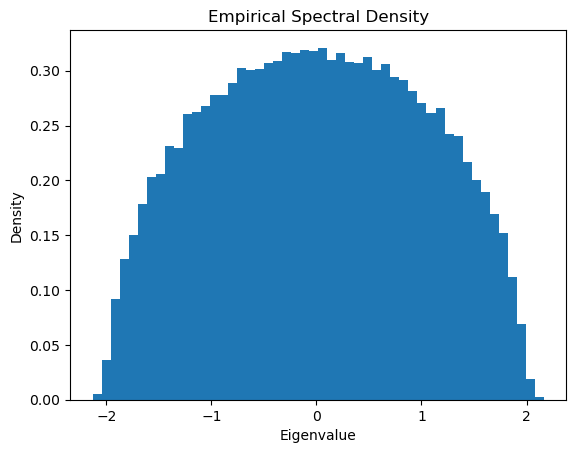

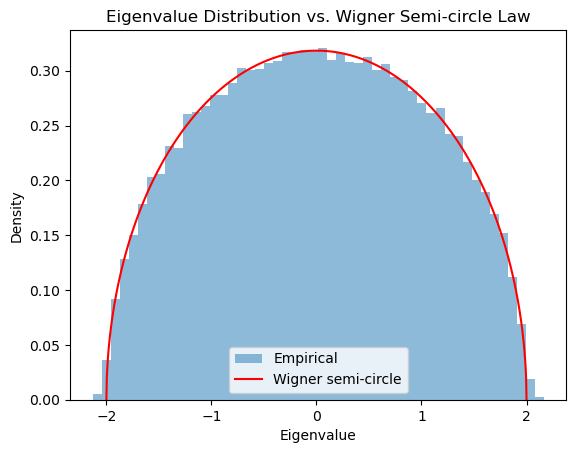

In [103]:
scale = np.sqrt(2/N/beta)*l
plot_spectral_density(eigenvalues_list,scale=scale)#np.sqrt(2)/np.sqrt(N))
plot_wigner_comparison(eigenvalues_list,scale=scale)#np.sqrt(2)/np.sqrt(N))

In [104]:
GOE_matrix = generate_GOE_matrix(2000)
eigenvalues_GOE = diagonalize(GOE_matrix)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


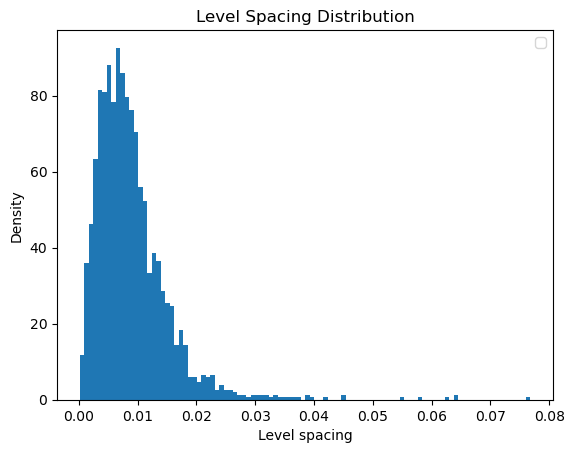

In [105]:
plot_level_spacing(eigenvalues_GOE,scale=scale)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


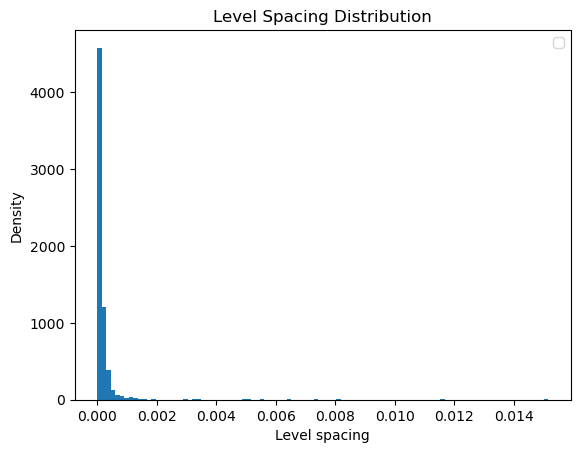

In [106]:
n = 1000
random_gaussian = np.random.normal(0,np.sqrt(n),n)
spacings = np.diff(np.sort(random_gaussian))
mean_spacing = np.mean(spacings)
plot_level_spacing(random_gaussian,scale=1/n)

GUE ($\beta =2$)

In [107]:
# Example usage
N = 100  # Matrix size
T = 500  # Number of trials
beta = 2
l = 1
eigenvalues_list_GUE = []
for _ in range(T):
    GUE_matrix = generate_GUE_matrix(N)
    eigenvalues = diagonalize(GUE_matrix)
    eigenvalues_list_GUE.append(eigenvalues)

eigenvalues_list_GUE = np.array(eigenvalues_list_GUE).flatten()


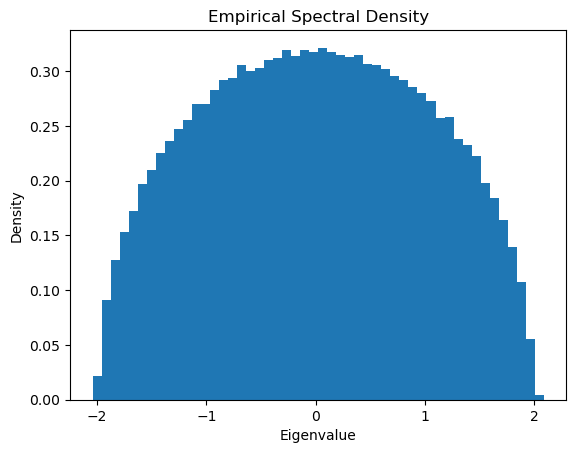

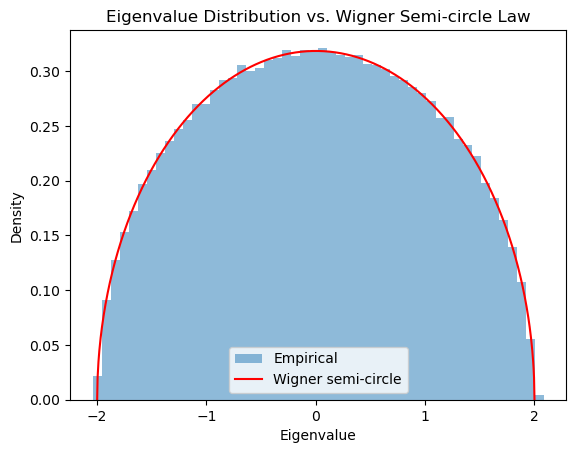

In [108]:
scale = np.sqrt(2/N/beta)*l
plot_spectral_density(eigenvalues_list_GUE,scale=scale)
plot_wigner_comparison(eigenvalues_list_GUE,scale=scale)


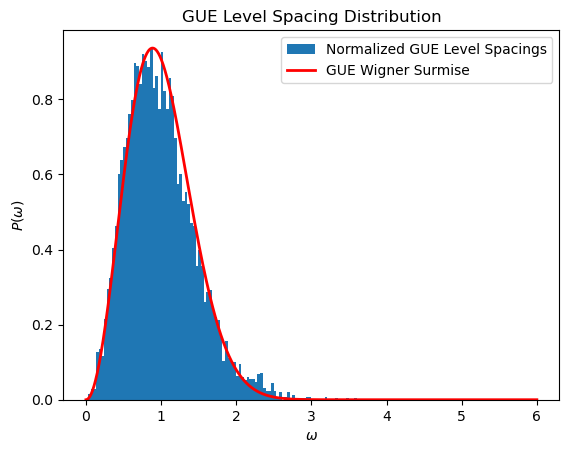

In [276]:
# GUE_matrix = generate_GUE_matrix(200)

spacing_GUE_list = []
T = 500
N = 15
scale = np.sqrt(2/N/beta)*l
for _ in range(T):
    GUE_matrix = generate_GUE_matrix(N)
    eigenvalues = diagonalize(GUE_matrix)
    spacing_GUE = np.diff(np.sort(eigenvalues))
    spacing_GUE_list.append(spacing_GUE)

spacing_GUE_list = np.array(spacing_GUE_list).flatten()
mean_spacing = np.mean(spacing_GUE_list)

def wigner_surmise_GUE(s):
    return 32/np.pi**2* s**2 * np.exp(-s**2 * 4 / np.pi)


plt.hist(spacing_GUE_list/mean_spacing, bins=100, density=True, label='Normalized GUE Level Spacings')
s_values = np.linspace(0, 6, 1000)
plt.plot(s_values, wigner_surmise_GUE(s_values), label='GUE Wigner Surmise',color='red',linewidth=2)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$P(\omega)$')
plt.title('GUE Level Spacing Distribution')
plt.legend()
plt.savefig('./GUE_level_spacing.png',dpi=300)
plt.show()

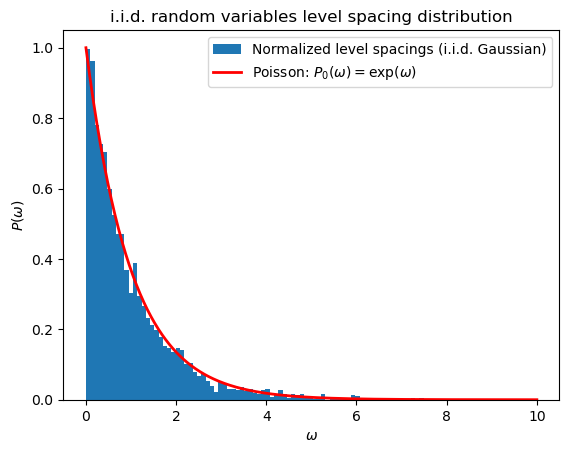

In [277]:
random_spacing_list = []
T = 300
N = 15
for _ in range(T):
    random_gaussian = np.random.normal(0, 1, N)
    spacing = np.diff(np.sort(random_gaussian))
    random_spacing_list.append(spacing)

random_spacing_list = np.array(random_spacing_list).flatten()
mean_spacing = np.mean(random_spacing_list)

def exponential_distribution(x, l):
    return l * np.exp(-l*x)


plt.hist(random_spacing_list/mean_spacing, bins=100, density=True, label='Normalized level spacings (i.i.d. Gaussian)')
plt.plot(np.linspace(0, 10, 500), exponential_distribution(np.linspace(0, 10, 500), l=1), label="Poisson: "+r'$P_0(\omega) = \exp(\omega)$', color='red',linewidth=2)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$P(\omega)$')
plt.title('i.i.d. random variables level spacing distribution')
plt.legend()
plt.savefig('./random_level_spacing.png',dpi=300)
plt.show()

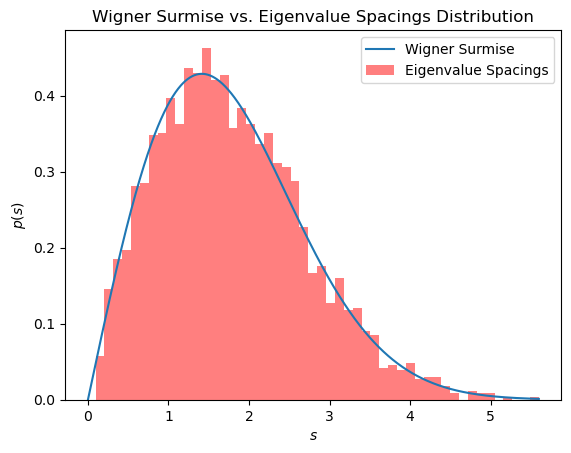

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definition of the Wigner surmise function
def wigner_surmise(s):
    return s * np.exp(-s**2 / 4) / 2

# Reads the number of matrices to be diagonalized from the user
Nmatr = int(3000)

# x is an empty list that will be used to collect all spacings
x = []

for nm in range(Nmatr):
    # Generate a 2x2 GOE random matrix
    x1, x2 = np.random.randn(2)
    x3 = np.random.randn() / np.sqrt(2)
    M = np.array([[x1, x3], [x3, x2]])
    
    # Calculate the eigenvalues and their spacing
    eigvals = np.linalg.eigvalsh(M)
    spacing = np.abs(np.diff(eigvals))
    x.append(spacing)

# Convert list of spacings to a flat NumPy array
x = np.concatenate(x)

# Plot of the Wigner surmise
s_values = np.linspace(0, np.max(x), 1000)
plt.plot(s_values, wigner_surmise(s_values), label='Wigner Surmise')

# Normalized spacing histogram
plt.hist(x, bins=50, density=True, alpha=0.5, color='r', label='Eigenvalue Spacings')

plt.title('Wigner Surmise vs. Eigenvalue Spacings Distribution')
plt.xlabel('$s$')
plt.ylabel('$p(s)$')
plt.legend()
plt.show()


In [140]:
import numpy as np

def autocorrelation(x):
    """Compute the autocorrelation of the signal, based on the properties of the
    power spectral density of the signal."""
    xp = x - np.mean(x)
    f = np.fft.fft(xp)
    p = np.array([np.real(v)**2 + np.imag(v)**2 for v in f])
    pi = np.fft.ifft(p)
    return np.real(pi)[:x.size // 2] / np.sum(xp**2)

def correlation_time(x):
    acf = autocorrelation(x)
    # Sum over the autocorrelations, stopping when acf becomes negative
    # This is a simple approach; more sophisticated methods might be needed for noisy data
    tau = 1 + 2 * np.sum(acf[1:np.argmax(acf < 0)])
    return tau

# Example usage
samples = np.random.randn(10000)  # Replace with your Monte Carlo samples
tau = correlation_time(samples)
print("Estimated correlation time:", tau)


[ 1.00000000e+00 -1.56780351e-02  2.36596952e-02 ... -5.41695437e-03
 -1.02518482e-03  5.48477010e-04]
Estimated correlation time: 1.0
